In [1]:
# Convolution and Fourier Transform from Scratch
import numpy as np

In [2]:
# Convolution of two arrays 

# (made it easy by padding the stationary array. This type is used mostly for DSP)
# h and x are both arrays. x is sliding over (convolving) h with stride 1
# while there is interception, the vectorwise multiplication will yield values. Store those values.

x = np.array([-3, 0, 1, 5])
h = np.array([2, 1, -1, 3, 4 ])

# feed x from the head (starting from element -3) to h which means reversing it and then sliding it over h.
# in short, the first values intercepting are -3 of x and 2 of h, then -3, 0 of x and 2,1 of h..
x = [x[i] for i in reversed(range(len(x)))]

# store results in sum_array
sum_array = np.zeros(len(x) + len(h) - 1)

# pad both sides of h array with 0 
# the padding for each side are as long as len(x)-1 
def pad_h_array(x,h):
    padded_h = []
    for i in range(len(x)-1):
        padded_h.append(0)
    for item in h:
        padded_h.append(item)
    for i in range(len(x)-1):
        padded_h.append(0)
    return padded_h
    
h_padded = np.array(pad_h_array(x, h))
print(x, h, sum_array, h_padded)


# convolve x over padded h array and store the values
i = 0
j = len(x) # window length
while i+j <= len(h_padded):
    window_h = h_padded[i:i+j]
    # print(window_h, len(h_padded), i+j)
    sum_x_h = np.sum(window_h * x)
    sum_array[i] = sum_x_h
    i += 1

print('convolution signal: ', sum_array)



[5, 1, 0, -3] [ 2  1 -1  3  4] [0. 0. 0. 0. 0. 0. 0. 0.] [ 0  0  0  2  1 -1  3  4  0  0  0]
convolution signal:  [-6. -3.  5.  2. -8. -2. 19. 20.]


In [3]:
# Convolution of two arrays without padding

# This type of convolution is used mostly for ML applications
# Convolution of two arrays (without padding) length of the convolution array is going to be: len(h) - len(x) + 1
# (ex:first value is: 3*-1 + 4*0 + 1*2 = -1)

x = [3, 4, 1]
h = np.array([2, 0, -1, 3, 4 ])
x = np.array([x[i] for i in reversed(range(len(x)))])

# store results in sum_array
sum_array = []
for i in range(len(h)- len(x)+1):
    window_pr = np.sum(h[i: i+len(x)] * x)
    sum_array.append(window_pr)
print(sum_array)



[-1, 5, 23]


In [4]:
# Find the largest values in a sparse matrix with a 3x3 frame sliding accross with a special convolution window

# create a random sparse matrix and put some unusual values inside
np.random.seed(0)
a = np.ones([10,10])
np.random.seed(0)
a[6][6] = 9
a[8][8] = 9          
print(a)


# create a random convolution matrix and put some unusual values to capture the 9-9 diagonal area in the sparse M.
conv_mat = np.zeros([3,3])
conv_mat[0][0] = 2
conv_mat[2][2] = 2

print(conv_mat) 

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 9. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 9. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[2. 0. 0.]
 [0. 0. 0.]
 [0. 0. 2.]]


In [5]:
# slide a 3x3 window over the matrix and find the frame that has the most valuestride = 1, no padding

stationary_mat = a
moving_mat = conv_mat

max_value = 0
for i in range(len(stationary_mat)- len(moving_mat)+1):
    for j in range(len(stationary_mat[0])-len(moving_mat[0])+1):
        sliding_w = stationary_mat[i:i+len(moving_mat), j:j+len(moving_mat[0])]
        sum_in_sliding_w = np.sum(sliding_w*moving_mat)
        if sum_in_sliding_w > max_value:
            max_value = sum_in_sliding_w
            best_w = sliding_w
print(max_value)
print(best_w)


36.0
[[9. 1. 1.]
 [1. 1. 1.]
 [1. 1. 9.]]


In [6]:
# with stride other than 1, no padding convolution
# use a 4x4 window matrix with stride 2. This time there will be no special values on the moving window. 
# since 4x4 window is made of just ones, there is no need for a multiplication. Slide the window and take the sum. 

moving_mat = np.ones([4,4]) # frame size
assert(len(stationary_mat)/2 != type(float)) # hop length is 2, just to make sure that the windows fit fully. 

max_value = 0
for i in range(0, len(stationary_mat)- len(moving_mat)+1, 2):
    for j in range(0, len(stationary_mat[0])-len(moving_mat[0])+1, 2): # start, stop, step
        sliding_w = stationary_mat[i:i+len(moving_mat), j:j+len(moving_mat[0])]
        sum_in_sliding_w = np.sum(sliding_w)
        if sum_in_sliding_w > max_value:
            max_value = sum_in_sliding_w
            best_w = sliding_w
print(max_value, best_w)


32.0 [[9. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 9. 1.]
 [1. 1. 1. 1.]]


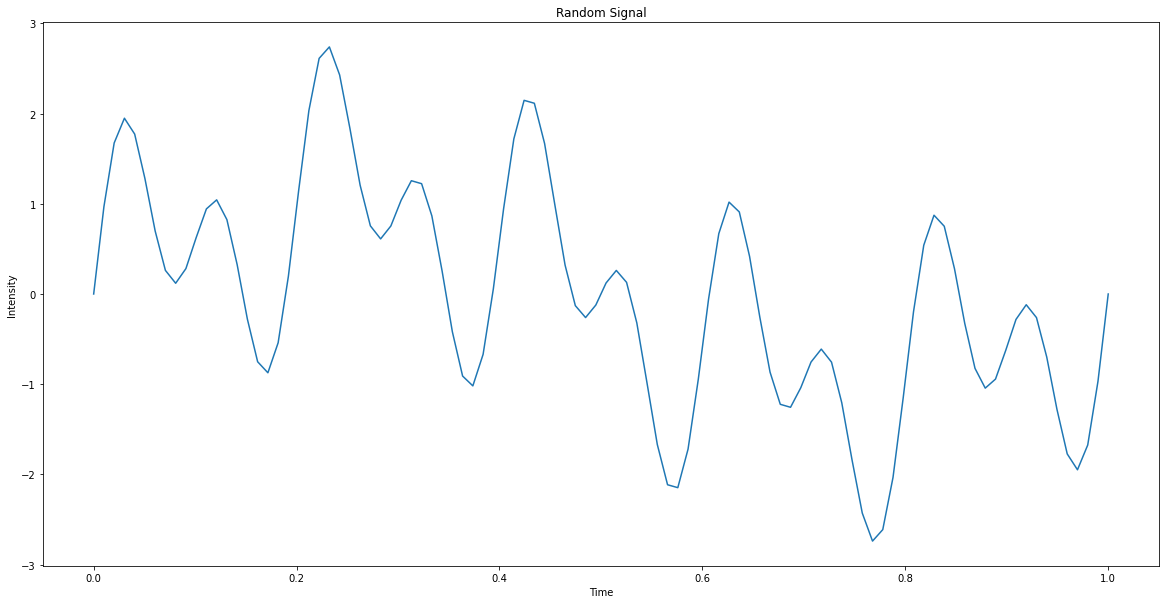

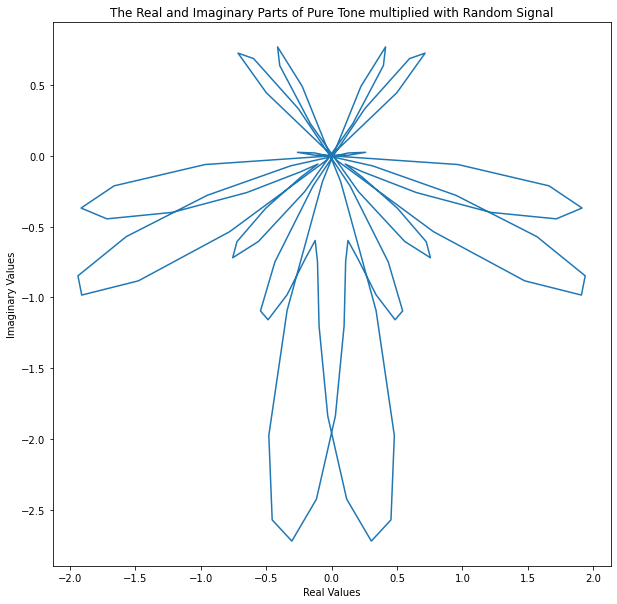

In [7]:
# Fourier Transform

# create some random sinus signals with 1,5,10 hertz for 1 second and add them up. 
# sampling rate is picked as 100 hertz
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

frequency = 1
time = np.linspace(0,1,100) # 0 to 1 second, 100 sample points
signal1 = np.sin(2 * np.pi * (1*frequency * time))
signal2 = np.sin(2 * np.pi * (5*frequency * time))
signal3 = np.sin(2 * np.pi * (10*frequency * time))
signal = signal1 + signal2 + signal3
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title("Random Signal")
plt.plot(time,signal)


# pure_tone = np.cos(angle) + 1j * np.sin(angle)
angle = -2 * np.pi * frequency * time
pure_tone = np.cos(angle) + 1j * np.sin(angle)


# multiply pure tone with the signal 
res = pure_tone * signal
X = [x.real for x in res]
Y = [x.imag for x in res]
plt.figure(figsize=(10, 10))
plt.title("The Real and Imaginary Parts of Pure Tone multiplied with Random Signal")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")
plt.plot(X, Y, '-')


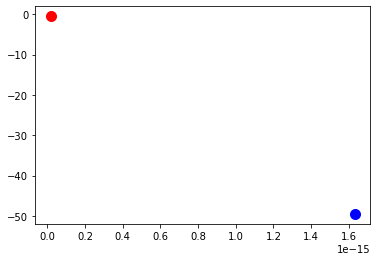

In [8]:
# Fourier Transform is the chart with magnitude on the y axis and frequency on the x axis. (blue ball)
x_center = np.mean([x.real for x in res])
y_center = np.mean([x.imag for x in res])

x_mag = np.sum([x.real for x in res])
y_mag = np.sum([x.imag for x in res])

plt.plot(x_center, y_center, marker='o', markersize=10, color="red")
plt.plot(x_mag, y_mag, marker='o', markersize=10, color="blue")
plt.show()

# center (red dot) is 0 which is sum of all the points making roundish circles around a point on the above plot.
# the magnitude of blue dot represents the magnitude of the sum of the signal, 
# 2 sec of the combination of 1 + 5 + 10 hertz sine waves 

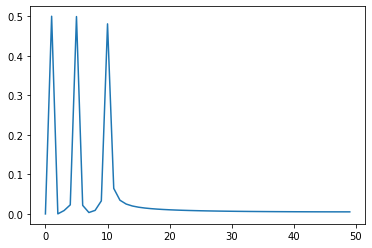

In [9]:
# The easy way to check the composition of the signal is to take FFT:

Y = np.fft.fft(signal) / len(signal) # take the fft
Y = np.abs(Y[:(len(signal)//2)]) # take the half and the abs value
plt.plot(np.arange((len(time)//2)), Y, '-') # (1, 5, 10 hertz signals were summed up)